In [1]:
# we will be using jacobi method to solve and find steady state solution

In [2]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [3]:
from mpl_toolkits import mplot3d
from matplotlib import cm

In [4]:
def analytical_solution(x, y, Lx, Ly):
    X, Y = np.meshgrid(x,y)
    u = (np.sinh(1.5 * np.pi * Y / Ly) *
         np.sin(1.5 * np.pi * X / Lx) /
         np.sinh(1.5 * np.pi * Ly / Lx))
    return u

In [5]:
# Parameters
Lx, Ly = 1.0 , 1.0
nx, ny = 41, 41

x = np.linspace(0.0, Lx, num=nx)
y = np.linspace(0.0, Ly, num=ny)

ua = analytical_solution(x, y, Lx, Ly)

In [6]:
def plot_3d(x, y, u):
    fig = pyplot.figure(figsize = (8.0, 6.0))
    ax = mplot3d.Axes3D(fig)
    X, Y = np.meshgrid(x,y)
    ax.plot_surface(X, Y, u, cmap=cm.viridis)
    ax.view_init(elev=30.0, azim=45.0)
    
    

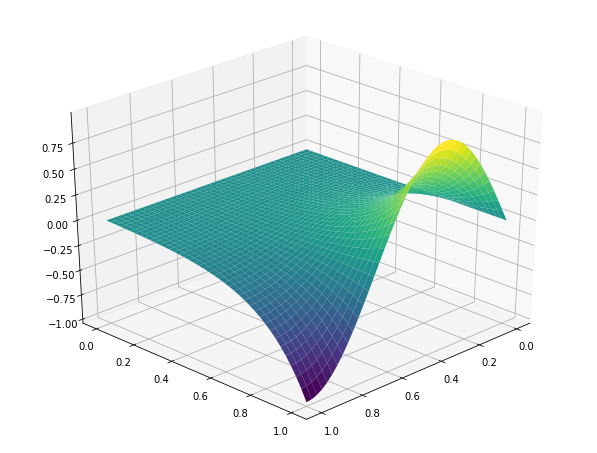

In [7]:
plot_3d(x, y, ua)

In [8]:
def relative_l2_norm(u, u_ref):
    rdiff = (np.sqrt(np.sum((u - u_ref)**2)) /
             np.sqrt(np.sum(u_ref**2)))
    return rdiff

In [9]:
#now we will implement the Jacobi method

def laplace2d_jacobi(u0, rtol=1e-6, maxiter=20000):
    u = u0.copy()
    k = 0
    diff = rtol + 1.0
    while diff > rtol and k < maxiter:
        un = u.copy()
        u[1:-1, 1:-1] = 0.25 * (u[:-2, 1:-1] + u[1:-1, :-2]
                               + u[1:-1, 2:] + u[2:, 1:-1])
        u[1:-1, -1] = u[1:-1, -2] 
        diff = relative_l2_norm(u, un)
        k += 1
    return u, k, diff

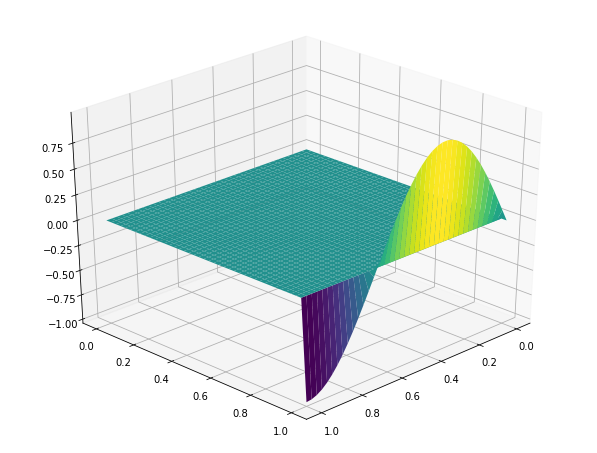

In [10]:
u0 = np.zeros((nx, ny))
u0[-1, :] = np.sin(1.5 * np.pi * x / Lx)
plot_3d(x, y, u0)

In [11]:
u, k, rdiff = laplace2d_jacobi(u0, rtol=1e-8)

4473 9.989253683884463e-09


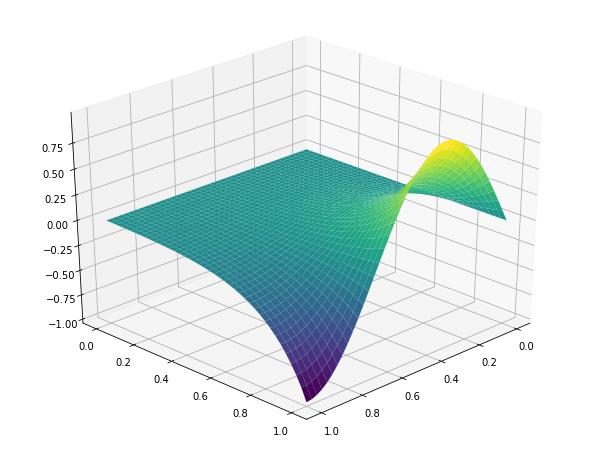

In [12]:
plot_3d(x, y, u)
print(k, rdiff)

In [13]:
# now we can look at order of convergence to see if we obtain what
# we expect

In [19]:
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    print(nx)
    x = np.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = np.zeros((nx, nx))
    u0[-1, :] = np.sin(1.5 *np.pi * x / Lx)
    u = laplace2d_jacobi(u0, rtol=1e-8)[0]
    ua = analytical_solution(x, y, Lx, Ly)
    error = relative_l2_norm(u, ua)
    errors.append(error)

11
21
41
81


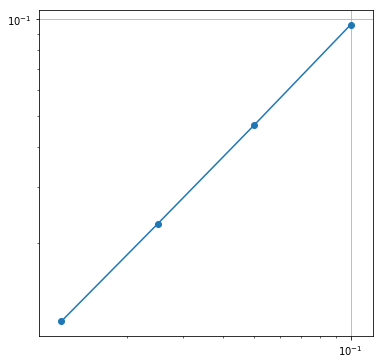

In [20]:
pyplot.figure(figsize=(6, 6))
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx / (nx -1))
pyplot.loglog(dx_values, errors, marker='o')
pyplot.axis('equal');

In [16]:
def laplace2d_jacobi_2(u0, rtol=1e-6, maxiter=20000):
    u = u0.copy()
    k = 0
    diff = rtol + 1.0
    while diff > rtol and k < maxiter:
        un = u.copy()
        u[1:-1, 1:-1] = 0.25 * (u[:-2, 1:-1] + u[1:-1, :-2]
                               + u[1:-1, 2:] + u[2:, 1:-1])
        
        #u[1:-1, -1] = u[1:-1, -2] 
        u[1:-1, -1] = 0.25 * (u[:-2, -1] + 2 * u[1:-1, -2] + u[2:, -1])
        diff = relative_l2_norm(u, un)
        k += 1
    return u, k, diff

In [21]:
nx_values = [11, 21, 41, 81]
errors = []

for nx in nx_values:
    print(nx)
    x = np.linspace(0.0, Lx, num=nx)
    y = x.copy()
    u0 = np.zeros((nx, nx))
    u0[-1, :] = np.sin(1.5 *np.pi * x / Lx)
    u = laplace2d_jacobi_2(u0, rtol=1e-8)[0]
    ua = analytical_solution(x, y, Lx, Ly)
    error = relative_l2_norm(u, ua)
    errors.append(error)

11
21
41
81


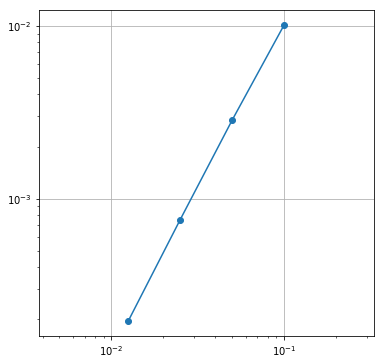

In [22]:
pyplot.figure(figsize=(6, 6))
pyplot.grid()
dx_values = []
for nx in nx_values:
    dx_values.append(Lx / (nx -1))
pyplot.loglog(dx_values, errors, marker='o')
pyplot.axis('equal');